In [ ]:
import pandas as pd
import statistics

In [ ]:
wine_data = pd.read_csv('wine_cleared.csv', sep=',')

In [ ]:
wine_df = wine_data.copy()

In [ ]:
wine_df.info()

country — страна-производитель вина.

description — подробное описание.

designation — название виноградника, где выращивают виноград для вина.

points — баллы, которыми WineEnthusiast оценил вино по шкале от 1 до 100.

price — стоимость бутылки вина.

province — провинция или штат.

region_1 — винодельческий район в провинции или штате (например Напа).

region_2 — конкретный регион. Иногда в пределах винодельческой зоны указываются более конкретные регионы (например Резерфорд в долине Напа), но это значение может быть пустым.

taster_name — имя сомелье.

taster_twitter_handle — твиттер сомелье.

title — название вина, которое часто содержит год и другую подробную информацию.

variety — сорт винограда, из которого изготовлено вино (например Пино Нуар).

winery — винодельня, которая производила вино.

In [ ]:
wine_df.head(3)

In [ ]:
# для удобства сразу преобразуем признак в int
wine_df['price_round'] = wine_df['price'].round().astype(int)

In [ ]:
regex = '\d+' # регулярное выражение для нахождения чисел
wine_df['year'] = wine_df['title'].str.findall(regex).str.get(0)

In [ ]:
wine_df['is_usa'] = wine_df['country'].apply(lambda x: 1 if x == 'US' else 0)

In [ ]:
wine_df['country'].value_counts()

In [ ]:
wine_df.describe()

In [ ]:
wine_df['is_france'] = wine_df['country'].apply(lambda x: 1 if x == 'France' else 0)

In [ ]:
wine_df['is_italy'] = wine_df['country'].apply(lambda x: 1 if x == 'Italy' else 0)

In [ ]:
wine_df['is_france'].sum() 

In [ ]:
wine_df['is_italy'].sum()

In [ ]:
wine_df['old_wine'] = wine_df['year'].apply(lambda x: 1 if float(x) < 2010 else 0)

In [ ]:
wine_df['old_wine'].value_counts()

In [ ]:
wine_df['old_wine'].sum()

In [ ]:
# преобразуем признак year в объект datetime для удобного сравнения дат
wine_df['year'] = pd.to_datetime(wine_df['year'], errors='coerce')

# для сравнения используем год, заполняем значения признака old_wine, где год вина меньше 2010
wine_df['old_wine'] = wine_df['year'].apply(lambda x: 1 if x.year < 2010 else 0) 
wine_df['old_wine'].sum()

In [ ]:
regex = '\((.*?)\)' # регулярное выражение для нахождения чисел
wine_df['locality'] = wine_df['title'].str.findall(regex).str.get(-1)

In [ ]:
wine_df['title'].iloc[129966]

In [ ]:
wine_df['locality'].iloc[129966]

In [ ]:
population_data = pd.read_csv('country_population.csv', sep=';')

In [ ]:
popdf = population_data.copy()

In [ ]:
popdf.head()

In [ ]:
#Найдем население Италии
popdf[popdf['country']=='Italy']

In [ ]:
popdf[popdf['country']=='Russia']

In [ ]:
wine_df = wine_df.join(popdf.set_index('country'), on='country')

In [ ]:
area_data = pd.read_csv('country_area.csv', sep=';')

In [ ]:
ardf = area_data.copy()

In [ ]:
ardf.head()

In [ ]:
wine_df = wine_df.join(ardf.set_index('country'), on='country')

In [ ]:
wine_df.head()

In [ ]:
wine_df[wine_df['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']

In [ ]:
import pandas as pd 

# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

In [ ]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

In [ ]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls

In [ ]:
calls['time_connection'].sum()

In [ ]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x>10 else 0)
calls

In [ ]:
calls['is_connection'].sum()

In [ ]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls

In [ ]:
calls['time_diff'].sum()

In [ ]:
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)
calls

In [ ]:
wine_df.head()

In [ ]:
wine_df['year'].value_counts()

In [ ]:
wine_df['years_diff'] = pd.to_datetime('2022-01-12') - wine_df['year']

In [ ]:
wine_df['years_diff'].max()

In [ ]:
import category_encoders as ce

In [ ]:
wine_df.head(3)

In [ ]:
wine_df.info()

In [ ]:
import category_encoders as ce # импортируем библиотеку для работы с кодировщиками

ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(wine_df[['year']])
wine_df = pd.concat([wine_df, data_bin], axis=1)

wine_df.head(3)

In [ ]:
wine_df.info()

In [ ]:
import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.OneHotEncoder(cols=['taster_name']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(wine_df['taster_name'])
wine_df2 = pd.concat([wine_df, type_bin], axis=1)

wine_df2.info()

In [ ]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(wine_df['country'])
wine_df3 = pd.concat([wine_df, type_bin], axis=1)

wine_df3.info()

In [ ]:
import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(wine_df['taster_twitter_handle'])
wine_df2 = pd.concat([wine_df, type_bin], axis=1)

wine_df2.info()

In [ ]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

In [ ]:
wine_df['price'].describe()

In [ ]:
price_ds = wine_df['price']
price_ds

In [ ]:
# для нормализации, стандартизации
from sklearn import preprocessing

In [ ]:
#6.4
r_scaler = preprocessing.RobustScaler()
data_array = np.array(wine_df['price']).reshape(-1,1)
data_price_r = r_scaler.fit_transform(data_array)
data_price_r.sum().round()

In [152]:
#6.5
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()
data_array = np.array(wine_df['price']).reshape(-1,1)
df_s = s_scaler.fit_transform(data_array)
df_s = pd.DataFrame(df_s, columns=['price'])

df_s['price'][129969]

-0.13551516993245472

<AxesSubplot:>

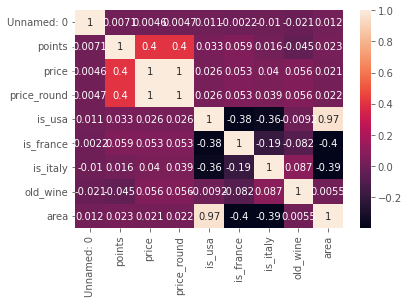

In [153]:
import seaborn as sns # импортируем seaborn для построения графиков
sns.heatmap(wine_df.corr(), annot=True) # включаем отображение коэффициентов